In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data = pd.read_csv('Cleaned-Data.csv')

In [4]:
data

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,Other


In [40]:
X = data.iloc[:, 0:12]
Y = data.iloc[:, 3]

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237600 entries, 304980 to 305711
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Fever                    237600 non-null  int64
 1   Tiredness                237600 non-null  int64
 2   Dry-Cough                237600 non-null  int64
 3   Difficulty-in-Breathing  237600 non-null  int64
 4   Sore-Throat              237600 non-null  int64
 5   None_Sympton             237600 non-null  int64
 6   Pains                    237600 non-null  int64
 7   Nasal-Congestion         237600 non-null  int64
 8   Runny-Nose               237600 non-null  int64
 9   Diarrhea                 237600 non-null  int64
 10  None_Experiencing        237600 non-null  int64
 11  Age_0-9                  237600 non-null  int64
dtypes: int64(12)
memory usage: 23.6 MB


In [8]:
knn = KNeighborsClassifier(n_neighbors=3)

In [16]:
knn.fit(X, Y)

KNeighborsClassifier(n_neighbors=3)

In [12]:
Y_pred = knn.predict(X_test)

In [13]:
confusion_matrix = confusion_matrix(Y_test, Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)

In [15]:
print("Matriz de Confusión:")
print(confusion_matrix)
print("Precisión:", accuracy)

Matriz de Confusión:
[[57590  5758]
 [14007  1845]]
Precisión: 0.7504419191919192


In [ ]:
distances, indices = knn.kneighbors(X)

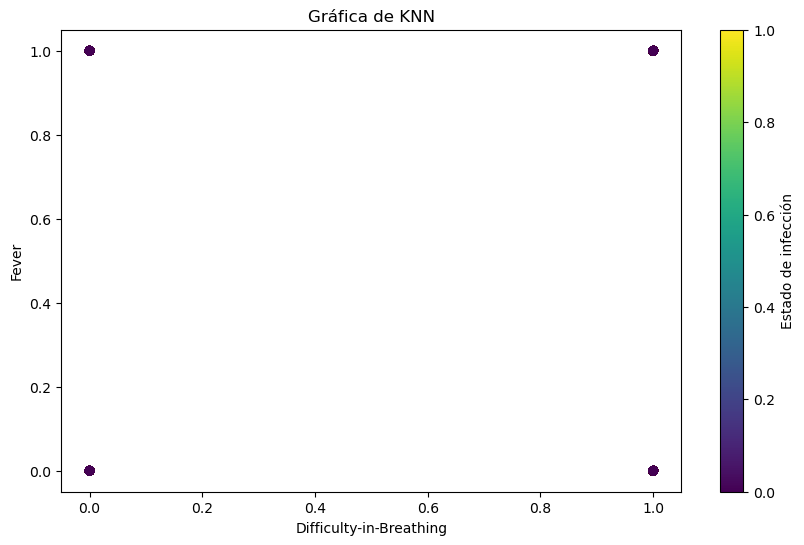

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap='viridis')
plt.colorbar(label='Estado de infección')
plt.xlabel('Difficulty-in-Breathing')
plt.ylabel('Fever')
plt.title('Gráfica de KNN')
plt.show()